# Symbolic regression or Current over pulse profile

The goal is to find a mathematical formual to describe the dependencies of the measured device current as a function of some (or all) of the available data.

In [89]:
import pandas as pd
import numpy as np
from pysr import PySRRegressor
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('measurements/C_4_1000_20231213_14_15_50.csv', sep=', ')
df = df[ ['Ch4(mA)','On time', 'Off time']]
df = df.rename(columns={'Ch4(mA)': 'Current'})
df = df.drop(df.index[:50*10])
df.head()

/tmp/ipykernel_11882/915701002.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('measurements/C_4_1000_20231213_14_15_50.csv', sep=', ')


,Current,On time,Off time
500,1.564,74,155
501,1.422,74,155
502,1.329,74,155
503,1.261,74,155
504,1.212,74,155


In [91]:
df2 = pd.read_csv('measurements/pattern_3,4,5,6,7,8,9,10_v1_20240514_15_36_25.csv', sep=', ')
df2 = df2.loc[:, (df2 != 0).any(axis=0)]
df2 = df2.drop(df2.index[:3000])
df2 = df2.drop(['Channel state', 'Pulse number', 'Pattern', 'Time', 'Probeflag'], axis=1)
df2.head()
      

/tmp/ipykernel_11882/1786059368.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv('measurements/pattern_3,4,5,6,7,8,9,10_v1_20240514_15_36_25.csv', sep=', ')


,Ch1(mA),Ch2(mA),Ch3(mA),Ch4(mA),Ch6(mA),Ch7(mA),Ch8(mA),Ch9(mA),Ch10(mA),Ch11(mA),Ch12(mA),Ch13(mA),Ch14(mA),Ch15(mA),Ch16(mA),On time,Off time
3000,0.6305,0.9482,0.8944,0.8602,1.188,0.6940,1.056,1.095,1.237,0.5621,1.442,1.339,1.217,1.408,0.6207,50,70
3001,0.6256,0.9531,0.8895,0.8602,1.193,0.6940,1.056,1.095,1.237,0.5621,1.442,1.339,1.212,1.408,0.6158,50,70
3002,0.6256,0.9531,0.8944,0.8602,1.193,0.6940,1.051,1.095,1.237,0.5621,1.442,1.344,1.212,1.408,0.6158,50,70
3003,0.6256,0.9482,0.8895,0.8602,1.188,0.6989,1.051,1.100,1.237,0.5621,1.442,1.339,1.217,1.408,0.6158,50,70
3004,0.6256,0.9482,0.8895,0.8602,1.193,0.6940,1.056,1.095,1.237,0.5621,1.442,1.339,1.217,1.408,0.6207,50,70


In [92]:
current_before = df['Current'][:-1]
# on_before = df['On time'][:-1]
# off_before = df['Off time'][:-1]
on = df['On time'][1:]
off = df['Off time'][1:]
# time = on +off
# current_1 = df['Current'][1:-1].values-current_before.values
# current_2 = df['Current'][2:].values
y_data = df['Current'][1:].values
# for i in range(1,17):
#    if f'Ch{i}(mA)'in df2.columns:
#         current_before = np.append(current_before,df2[f'Ch{i}(mA)'][:-1],axis = 0)
#         on = np.append(on,df2['On time'][1:],axis = 0)
#         off = np.append(off,df2['Off time'][1:],axis = 0)
#         y_data = np.append(y_data,df2[f'Ch{i}(mA)'][1:],axis = 0)

X_data = np.zeros((current_before.shape[0],3))
X_data[:,0] = current_before
X_data[:,1] = on
X_data[:,2] = off
# X_data[:,0] = time
# X_data[:,3] = on_before
# X_data[:,4] = off_before

# y_data = np.zeros((current_before.shape[0],1))
# y_data[:,0] = current_1
# y_data[:,1] = current_2


print(f"X shape:{X_data.shape}")
print(f"y shape:{y_data.shape}")


X shape:(49499, 3)
y shape:(49499,)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, train_size=0.5)

names = [ 'C_1','T_ON', 'T_OFF']

In [94]:
# list of all parameters https://astroautomata.com/PySR/api/
model = PySRRegressor(
    niterations=50,
    binary_operators=['+', '-', '*','/'],
    unary_operators= [
        "exp",
        "log",
        # "sqrt",
        # "cbrt",
        "square",
        # "abs",
    ],
    verbosity=0,
    batching = True,
    batch_size = 1024
)

# fit the model to the trainings data
model.fit(X_train, y_train, variable_names=names)
# print all models which are on the paretto frontier
print(model)
# print the automatically choosen model
model.sympy()

/home/daniel/.local/lib/python3.10/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                       -0.054385964   
	1         1.347722                                     log(2.2915606)   
	2         6.673743                                   0.99991214 * C_1   
	3         0.000047                          C_1 * square(-0.99988306)   
	4         0.053363                         (0.20839602 / T_OFF) + C_1   
	5         0.023272                    C_1 + square(-2.414749 / T_OFF)   
	6         0.108931           (C_1 * 0.98855805) + (0.6867887 / T_OFF)   
	7   >>>>  0.109602              (((T_ON / T_OFF) - C_1) / T_ON) + C_1   
	8         0.004291  ((T_ON - (C_1 * (T_OFF - C_1))) / (T_ON * T_OF...   
	9         0.001040  ((T_ON - (C_1 * T_OFF)) / ((T_OFF * T_ON) + (C...   
	10        0.002366  ((T_ON - (C_1 * (T_OFF - (-2.547794 * -0.64152...   
	11        0.007099  ((T_ON - (C_1 * (T_OFF - (-2.547794 * -0.64152...   
	
	      

C_1 + (-C_1 + T_ON/T_OFF)/T_ON

In [95]:
# print training and testing errors
print(f"Trainings Error: {mean_absolute_error(y_train, model.predict(X_train))}")
print(f"Testing Error: {mean_absolute_error(y_test, model.predict(X_test))}")

Trainings Error: 0.008324951307086128
Testing Error: 0.008186834108056252


In [96]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()#path ="C:/Users/cierpind/Downloads/mnist.npz" ) # can also remove path
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [97]:
import functions
index_list = [3,4,5,6,7,8,9,10]
array_size = 784
number_models = 1

base_on_time= 50
on_time = 50
off_time= 20

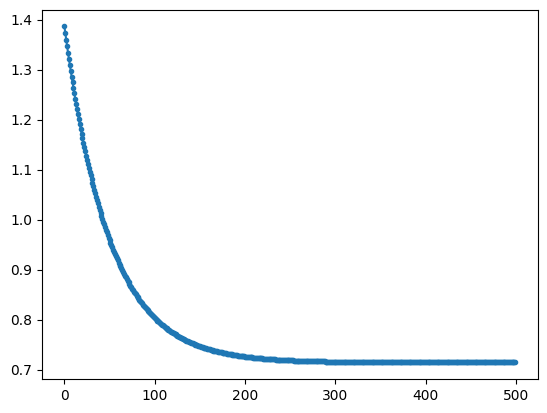

In [98]:
functions.baseline_current = 1.4
functions.model = model
pulse_count_baseline = 500
base_calc_current, base_calc_on, base_calc_off = functions.pixel_to_signal_array(np.zeros((1,pulse_count_baseline)), base_on_time, on_time, off_time, modulation=1, max_int=1, linearize=False)
plt.plot(range(pulse_count_baseline),base_calc_current[0,:], marker='.', linestyle='-')  


In [101]:
baseline_current = base_calc_current[0,:].min()
functions.baseline_current = baseline_current
baseline_current

0.7143138450183852

In [102]:
simulated_current_array = np.zeros((len(index_list),number_models, array_size))

for j, index in enumerate(index_list):
    simulated_current, _,_ = functions.pixel_to_signal_array(x_train[index], base_on_time, on_time, off_time, modulation=1, max_int=255, linearize=True)



    simulated_current_array[j] = simulated_current

In [103]:
df = pd.read_csv('measurements/pattern_3,4,5,6,7,8,9,10_v1_20240514_15_36_25.csv', sep=', ')
df = df[df.Probeflag]
df = df.loc[:, (df != 0).any(axis=0)]
df_list = np.array_split(df,len(index_list))

/tmp/ipykernel_11882/654585454.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('measurements/pattern_3,4,5,6,7,8,9,10_v1_20240514_15_36_25.csv', sep=', ')
/home/daniel/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


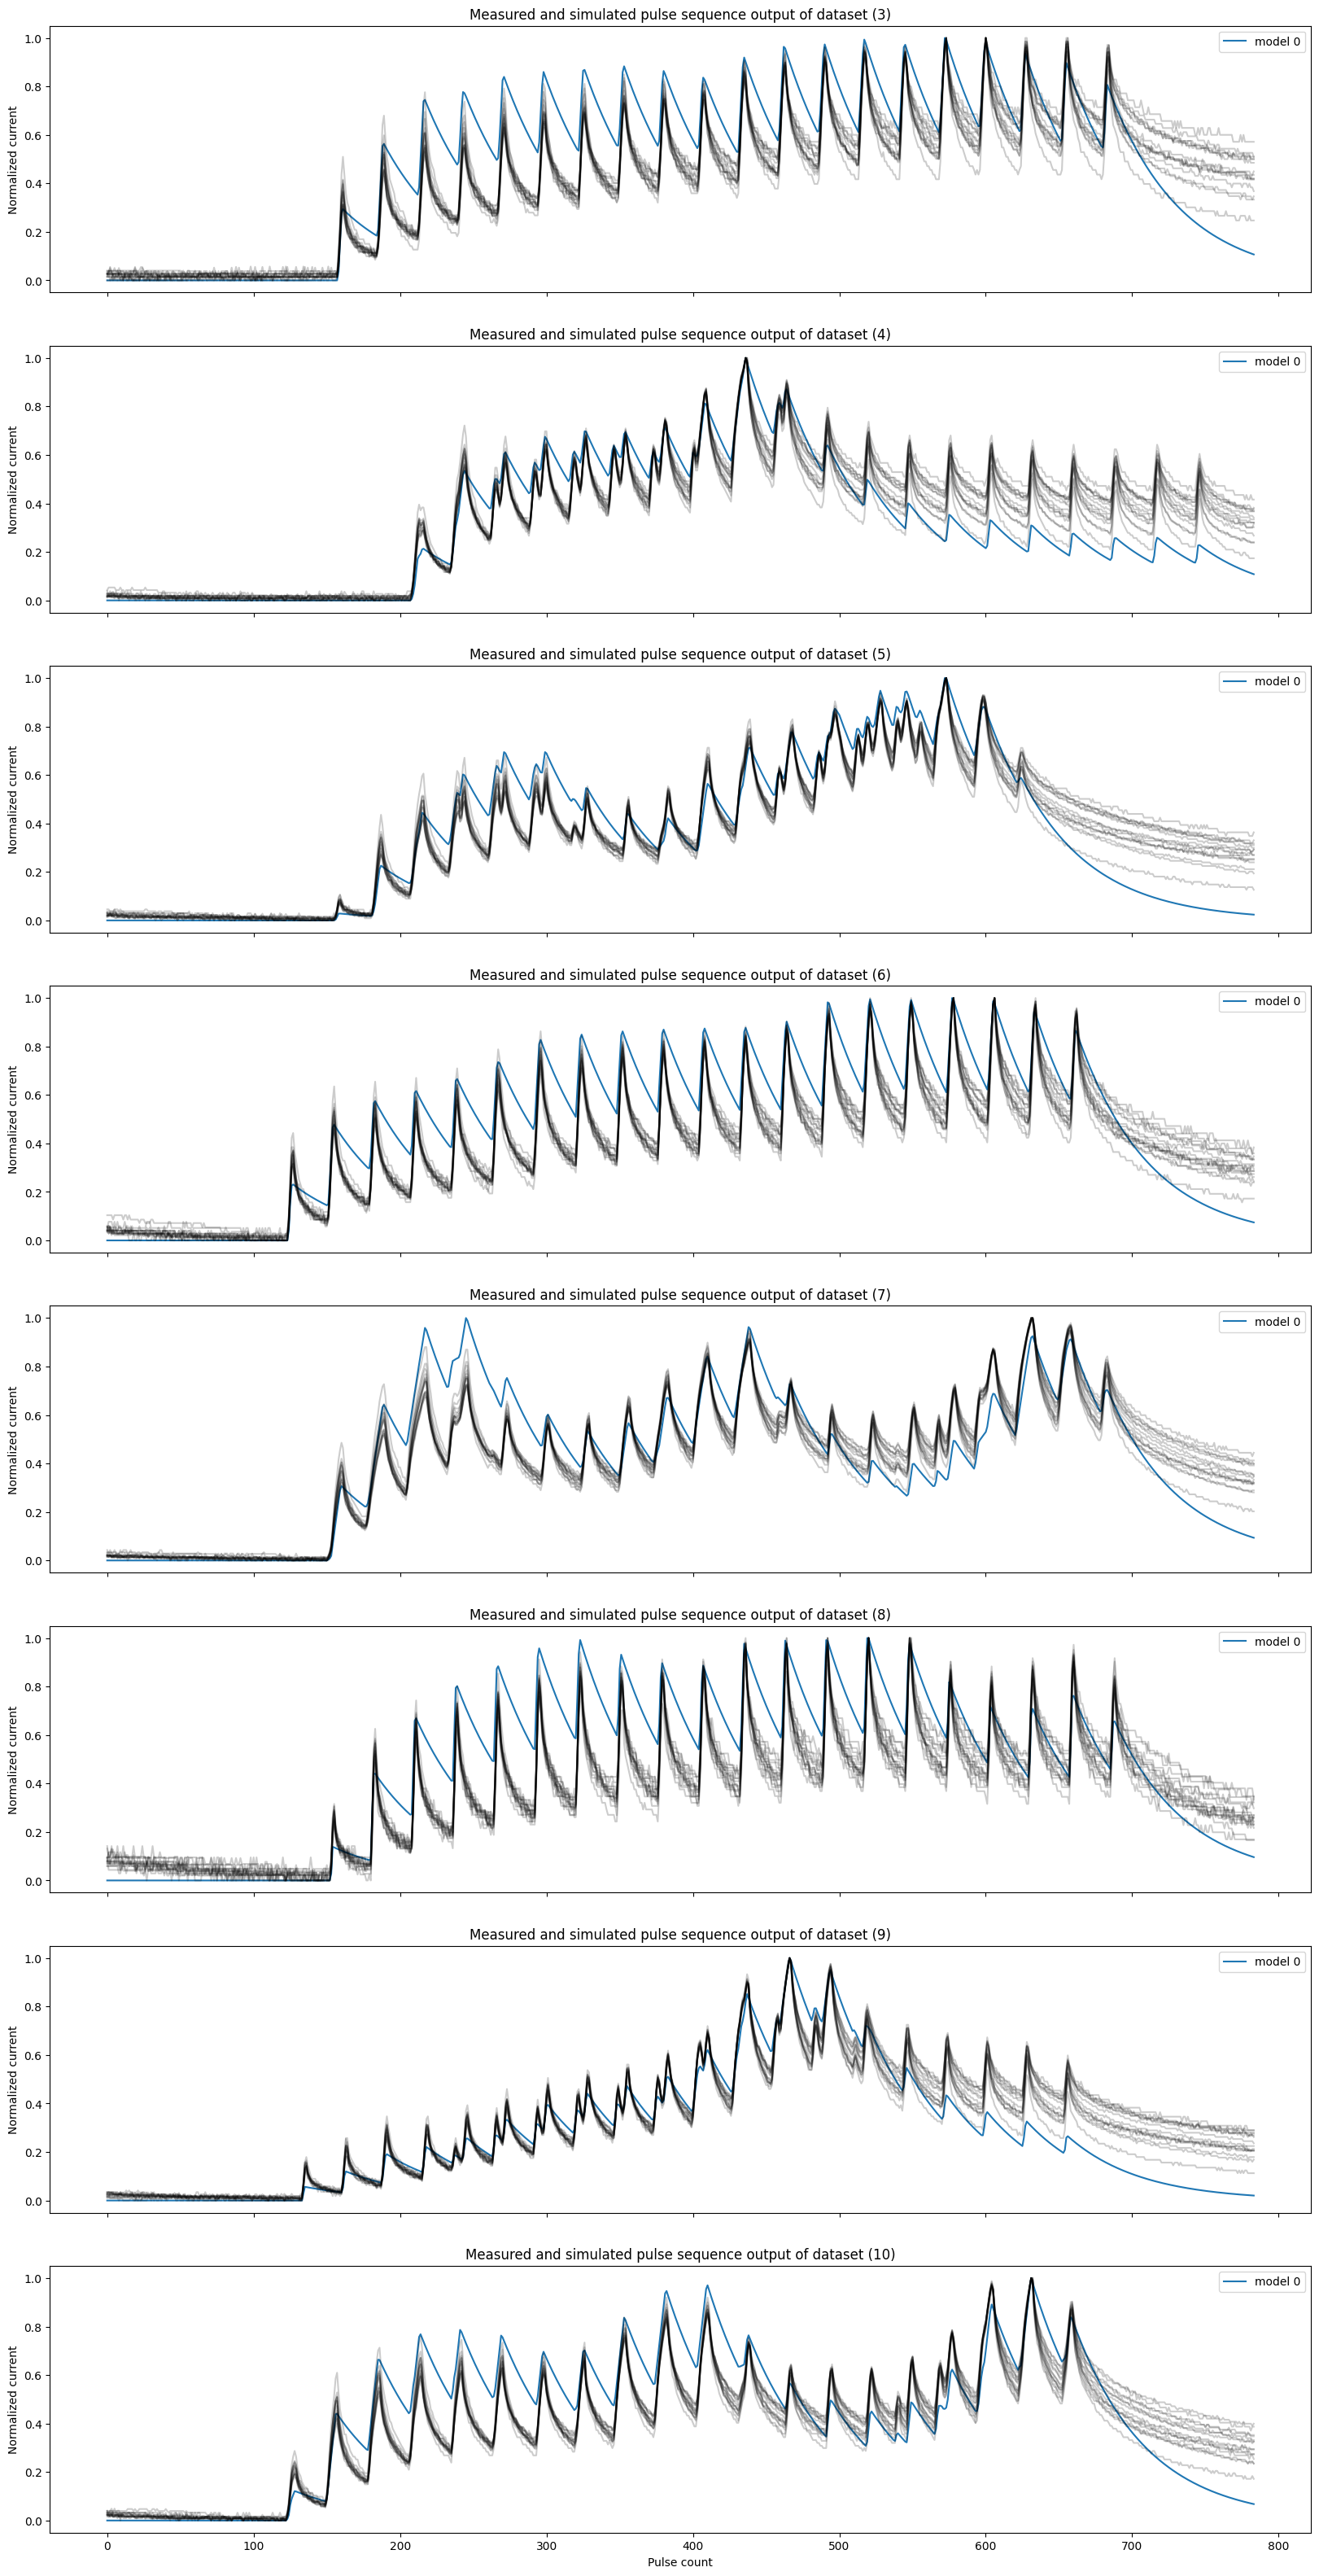

In [104]:
fig, axs = plt.subplots(len(index_list),sharex= True, figsize=(20,40))

for j, index in enumerate(index_list):
   # plot simulation  
   for i in range(1):
      axs[j].plot(range(array_size),pre.minmax_scale(simulated_current_array[j,i]), linestyle='-',label = f'model {i}', )
   # plot data
   for i in range(1,17):
      if f'Ch{i}(mA)'in df_list[j].columns:
         axs[j].plot(range(array_size),pre.minmax_scale(df_list[j][f'Ch{i}(mA)']),alpha=0.2, color = 'black') #label = f'Ch{i}'
   axs[j].set_ylabel('Normalized current')
   axs[j].set_title(f'Measured and simulated pulse sequence output of dataset ({index})')
   axs[j].set_xlabel('Pulse count')
   axs[j].legend()
for ax in axs.flat:
    ax.label_outer()